In [27]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

In [2]:
motors = pd.read_csv('dataset/auto-mpg-clean.csv')
motors.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Understanding the data

In [3]:
corr = motors.corr()
corr['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='model year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='horsepower', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='model year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
   

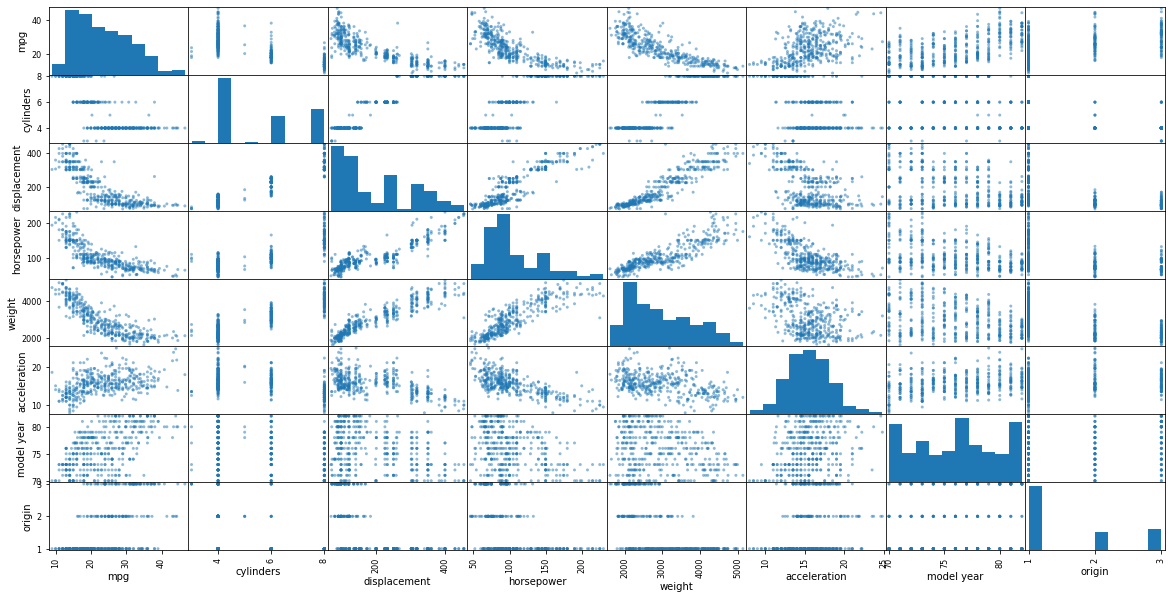

In [17]:
scatter_matrix(motors[motors.columns],figsize=(20,10))

In [22]:
# Getting features and targets
x = motors.drop(['mpg','car name'],axis=1)
y = motors['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((313, 7), (79, 7))

## Build the Model

In [26]:
reg = LinearRegression()
reg.fit(x_train, y_train)
np.sqrt(mean_squared_error(y_test, reg.predict(x_test)))

3.272745700300953

### Polynomial Features

In [31]:
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
258,6,225.0,110,3620,18.7,78,1
182,4,140.0,92,2572,14.9,76,1
172,6,171.0,97,2984,14.5,75,1
63,8,318.0,150,4135,13.5,72,1
340,4,86.0,64,1875,16.4,81,1


### Degree 2

In [32]:
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
reg2 = LinearRegression()
reg.fit(x_train_poly, y_train)
x_poly_test = pf.transform(x_test)
np.sqrt(mean_squared_error(y_test, reg.predict(x_poly_test)))

2.6707634428543803

In [36]:
x_train_poly.shape

(313, 36)

In [38]:
pf.get_feature_names()

/Users/shrikantkendre/miniforge3/envs/tf2M1/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2']

### Degree 3

In [42]:
pf = PolynomialFeatures(degree=3)
x_train_poly = pf.fit_transform(x_train)
reg2 = LinearRegression()
reg.fit(x_train_poly, y_train)
x_poly_test = pf.transform(x_test)
np.sqrt(mean_squared_error(y_test, reg.predict(x_poly_test)))

4.138206127678062